In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite2d'
run_name = 'nac'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

In [2]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(data_dir+'param_env.txt')
print(env_params)

{'int_steps': '0.0005', 'ep_length': '50', 'decision_time': '0.01', 'init_theta': '0.7853981633974483', 'init_dtheta': '0', 'alphas': '-4,0,4,8,12,14,16,18,20', 'CL_alphas': '0.05,0.35,0.55,0.75,0.9,1.0,1.08,1.1,1.05', 'CD_alphas': '0.001,0.01,0.03,0.07,0.1,0.13,0.18,0.18,0.21', 'init_alpha': '10', 'wind_type': 'const', 'v_wind_x': '10', 'v_wind_y': '0'}


In [3]:
# WRITING THE EVALUATION PARAMETERS
params = dict()
params['ev_time'] = 200 # sec
params['ep_length'] = 200 # sec. the episode length is overwritten during the evaluation
params['traj_points'] = 1000
params['gamma'] = 1
ut.write_params(params, data_dir, 'param_ev.txt')

In [4]:
# COMPILING C++ SCRIPT
comp_list = np.array(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", "../lib/wind.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/kite2d.cpp", "-std=c++17"])
comp_str = ""
for s in comp_list: comp_str+=s+" "
print('To compile from terminal: ')
print(comp_str)

To compile from terminal: 
g++ -o evaluate.exe evaluate.cpp ../lib/eval.cpp ../lib/utils.cpp ../lib/wind.cpp ../lib/envs/kite.cpp ../lib/envs/kite2d.cpp -std=c++17 


In [5]:
s_traj, s_labels = ut.read_traj(data_dir+'ev_states.txt')
aux_m, aux_l = ut.read_traj(data_dir+'ev_return.txt')
returns = aux_m[:,0]
ep_length = aux_m[:,1]

In [6]:
returns

array([79.738])

Text(0, 0.5, 'y-axis')

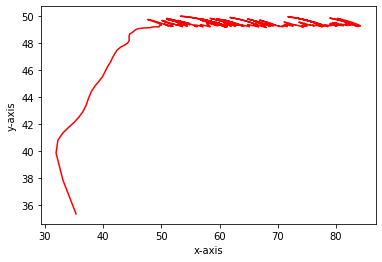

In [7]:
plt.plot(s_traj[:,0], s_traj[:,1], c='red')
#plt.title('Streamlines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

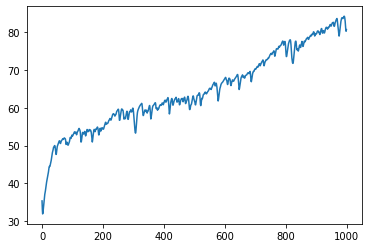

In [8]:
plt.plot(s_traj[:,0])

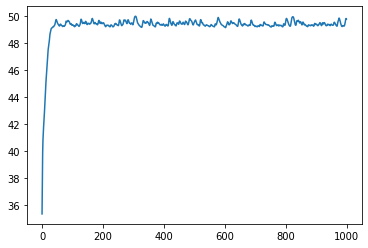

In [9]:
plt.plot(s_traj[:,1])